# Plant Seedlings Image Classification

# 1. <a name = "link1"></a> Problem Statement

I am using the Plant Seedlings Dataset from Aarhus University's Computer Vision and Biosystems Signal Processing Group. They planted 12 different species of seedlings at the Flakkebjerg Research station, under controlled conditions, and regularly monitored the seedlings to capture images of them at various stages of their growth. The result is a dataset of nearly 4,750 images consisting of 12 species of seedlings.

The goal of this project is to build a CNN model to classify the 12 species of seedlings. The ability to do so effectively can mean better crop yields and better stewardship of the environment.


### Dataset

The data file names are:
- images.npy - this numPy array holds the images
- Label.csv - This csv contains the labels of plants

Steps involved in this project include the following

- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

## Index


- <a href = #link1># Problem Statement </a>

- <a href = #link2># Loading libraries </a>


- <a href = #link3># Loading and exploring the data </a> 


- <a href = #link4># Data Pre-processing </a>


- <a href = #link5># Model building </a>


- <a href = #link6># Plotting the Train & Test Accuracy </a>


- <a href = #link7># Model Evaluation </a>

- <a href = #link8># Plotting the confusion matrix for the two best models </a>

- <a href = #link9># Prediction</a>
- <a href = #link10># Conclusion</a>

# 2. <a name = "link2"></a>Loading libraries

In [80]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adadelta

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from sklearn.preprocessing import LabelBinarizer
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import cv2
from google.colab.patches import cv2_imshow

# 3. <a name = "link3"></a>Loading and exploring the data
In this section the goal is to load the images and labels into a numpy array and dataframe respectively, and check its basic properties. This will include the shape, distinct labels of species, percentage of images under each labels and visualize the images

In [81]:
#Defining the path of the dataset
project_path = '/content/drive/My Drive/'
image = project_path + 'images.npy'
label = project_path + 'Labels.csv'

In [82]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [83]:
#reading dataset
picture = np.load(image)
label= pd.read_csv(label)

### 3.1 Shape of the images

In [84]:
print('The shape of image is: ', picture.shape)
# Extracting the height and width of an image 
h, w = picture.shape[1:3] 
# Displaying the height and width 
print("Height = {},  Width = {}".format(h, w)) 

The shape of image is:  (4750, 128, 128, 3)
Height = 128,  Width = 128


In [85]:
print("Distinct :", label.apply(lambda x: len(x.unique())))
label['Label'].unique()

Distinct : Label    12
dtype: int64


array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

There are total of 12 unique plant species type in the dataset

In [86]:
label['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64

### 3.2 Label Count

In [87]:
# Function to create bar plots that indicate percentage for each category.


def perc_on_bar(z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    """

    total = len(label[z])  # length of the column
    plt.figure(figsize=(20, 5))
    ax = sns.countplot(label[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

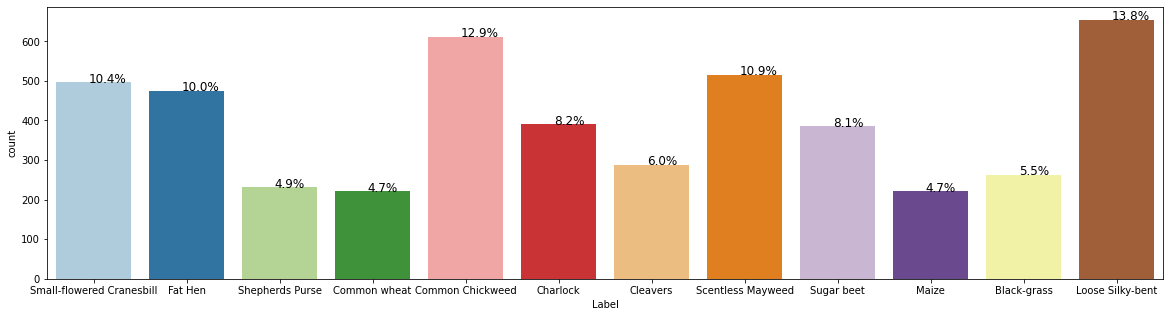

In [88]:
perc_on_bar("Label")

`Loose-Silky-bent` is the highest percentage class in the dataset, followed by `common chickweed`. `Maize` and `Common wheat` has the least % of labels present in the dataset

### 3.3 Visualize Images

Plot the images from each class and printing their corresponding labels

(-0.5, 127.5, 127.5, -0.5)

<Figure size 1080x1080 with 0 Axes>

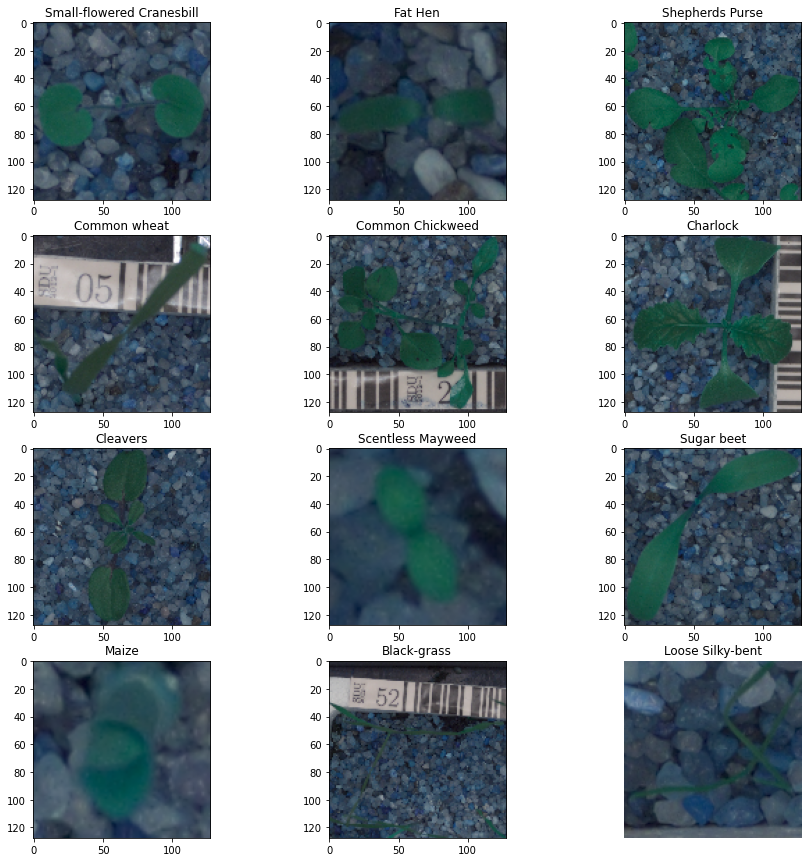

In [89]:
plt.figure(figsize=(15, 15))
fig, axs = plt.subplots(4, 3, figsize = (15,15))
axs[0, 0].imshow(picture[0])
axs[0, 0].set_title(label.loc[0, "Label"])
axs[0, 1].imshow(picture[498])
axs[0, 1].set_title(label.loc[498, "Label"])
axs[0, 2].imshow(picture[1000])
axs[0, 2].set_title(label.loc[1000, "Label"])

axs[1, 0].imshow(picture[1240])
axs[1, 0].set_title(label.loc[1240, "Label"])
axs[1, 1].imshow(picture[1500])
axs[1, 1].set_title(label.loc[1500, "Label"])
axs[1, 2].imshow(picture[2085])
axs[1, 2].set_title(label.loc[2085, "Label"])

axs[2, 0].imshow(picture[2492])
axs[2, 0].set_title(label.loc[2492, "Label"])
axs[2, 1].imshow(picture[2715])
axs[2, 1].set_title(label.loc[2715, "Label"])
axs[2, 2].imshow(picture[3264])
axs[2, 2].set_title(label.loc[3264, "Label"])

axs[3, 0].imshow(picture[3624])
axs[3, 0].set_title(label.loc[3624, "Label"])
axs[3, 1].imshow(picture[3871])
axs[3, 1].set_title(label.loc[3871, "Label"])
axs[3, 2].imshow(picture[4135])
axs[3, 2].set_title(label.loc[4135, "Label"])


plt.axis("off")

### 3.4 Mean Images

In [90]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    mean_img = mean_img.reshape((128,128))
    # reshape it back to a matrix
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

In [91]:
CATEGORIES = ["Small-flowered Cranesbill", "Fat Hen", "Shepherds Purse",
       "Common wheat", "Common Chickweed", "Charlock", "Cleavers",
       "Scentless Mayweed", "Sugar beet", "Maize", "Black-grass",
       "Loose Silky-bent"]

In [92]:
IMG_SIZE = 128
sfc_data=[]
fh_data=[]
sp_data=[]               
cw_data=[]
cc_data=[]
ck_data=[]
cs_data=[]               
sm_data=[]
sb_data=[]
ma_data=[]
bg_data=[]               
lsb_data=[]

for cat in CATEGORIES:
  for indx, img in enumerate(picture):
    img_array = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    if cat==CATEGORIES[0]:
      sfc_data.append([new_array])
    if cat==CATEGORIES[1]:
      fh_data.append([new_array])
    if cat==CATEGORIES[2]:
      sp_data.append([new_array])
    if cat==CATEGORIES[3]:
      cw_data.append([new_array])
    if cat==CATEGORIES[0]:
      cc_data.append([new_array])
    if cat==CATEGORIES[1]:
      ck_data.append([new_array])
    if cat==CATEGORIES[2]:
      cs_data.append([new_array])
    if cat==CATEGORIES[3]:
      sm_data=[].append([new_array])  
    if cat==CATEGORIES[0]:
      sb_data.append([new_array])
    if cat==CATEGORIES[1]:
      ma_data.append([new_array])
    if cat==CATEGORIES[2]:
      bg_data.append([new_array])
    if cat==CATEGORIES[3]:
      lsb_data.append([new_array])


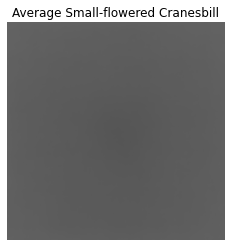

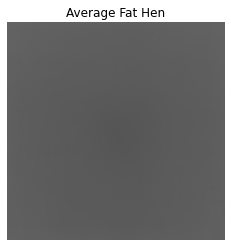

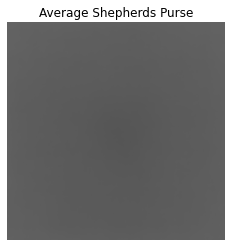

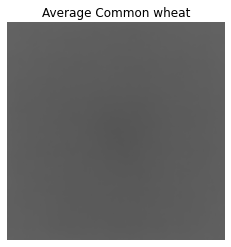

In [93]:
sfc_mean = find_mean_img(np.array(sfc_data), 'Small-flowered Cranesbill')
fh_mean = find_mean_img(np.array(fh_data), 'Fat Hen')
sp_mean = find_mean_img(np.array(sp_data), 'Shepherds Purse')
cw_mean = find_mean_img(np.array(cw_data), 'Common wheat')

Getting the mean values of the images by the species class and visualize the images in grayscale. It appears that the image turns darker with this approach. It needs further investigation to understand the behaviour

# 4. <a name = "link4"></a>Data Pre-processing

### 4.1 Normalization

Visualizing Image before normalization

Image before normalization:



Text(0.5, 1.0, 'Small-flowered Cranesbill')

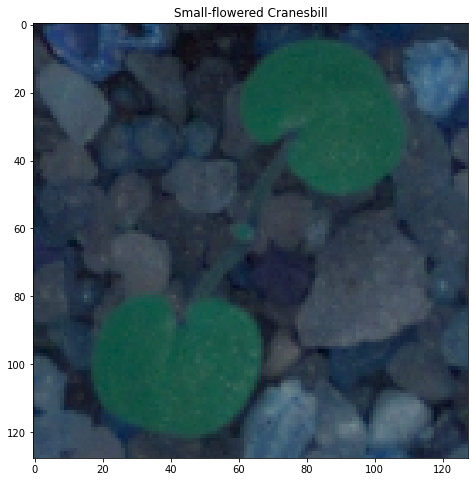

In [94]:
plt.figure(figsize=(8, 8))
i = 5
print('Image before normalization:\n')
plt.imshow(picture[i])
plt.title(label.loc[i, "Label"])

Applying normalization

To normalize the images, I am taking the mean and standard deviation. Using the regular method of diving by 255, did not seem to work as it turns all values into floating values and the resultant image appeared dark, even after multipling the visualization with 255. In addition the model accuracy was also bad. So, here I am taking the mean and standard deviation of the array and using a formula to normalize it


In [95]:
for indx, image in enumerate(picture):
  img_mn = np.mean(image)
  img_std = np.std(image)
  picture[indx] = (image-img_mn)/ img_std

Visualizing after applying normalization.

Image after normalization:



Text(0.5, 1.0, 'Small-flowered Cranesbill')

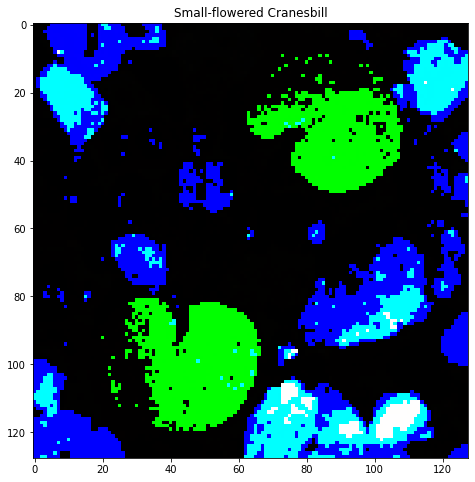

In [96]:
plt.figure(figsize=(8, 8))
i = 5
print('Image after normalization:\n')
plt.imshow(picture[i]*255)
plt.title(label.loc[i, "Label"])

### 4.2 Gaussian Blurring

Applying Gaussian Blurring to all images

In [97]:
for indx, image in enumerate(picture):
  picture[indx] = cv2.GaussianBlur(image, (5, 5), 3)
  #print(indx, image)

Visualizing sample image after applying gaussian blurring

Blurred Image:



Text(0.5, 1.0, 'Small-flowered Cranesbill')

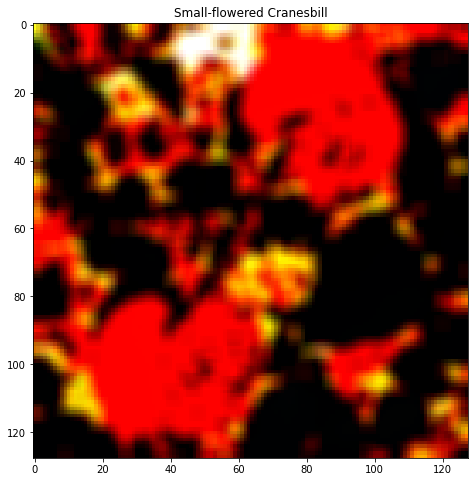

In [98]:
plt.figure(figsize=(8, 8))
i = 5
print('Blurred Image:\n')
plt.imshow(picture[i])
plt.title(label.loc[i, "Label"])

### 4.3 Train Test Split

Spliting data into training and testing set

- training set : 70%

- testing set: 30%

In [99]:
# Apply label encoding to covert the label values into digits
enc = LabelBinarizer()
y = enc.fit_transform(label)
#y= to_categorical(np.array(y))
X = picture
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

Create validation set
- split test data into 50% test, 50% validation

In [100]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [101]:
y[1500]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [102]:
#Train shape
print("X train shape :", X_train.shape)
print("y train shape :", y_train.shape)

# Test  shape
print("X test shape :", X_test.shape)
print("y test shape :", y_test.shape)

# Validation shape
print("X test shape :", X_val.shape)
print("X test shape :", Y_val.shape)

X train shape : (3325, 128, 128, 3)
y train shape : (3325, 12)
X test shape : (712, 128, 128, 3)
y test shape : (712, 12)
X test shape : (713, 128, 128, 3)
X test shape : (713, 12)


Keras supports tensor with 3 dimensions.Since we have 3325 images in training set of 128x128 pixels in RGB (3 channels), the shape of the input data in (3325,128,128,3) is supported by Keras, so reshaping is not necessary.

# 5.<a name = "link5"></a>Model Building

## Model 1: CNN with Dropout

In [103]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model1 = Sequential()
#
y_train=np.array(y_train)
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
#
model1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.25))
#
model1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.3))
#
model1.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.3))

#
model1.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model1.add(Dropout(0.3))

# 
model1.add(Flatten())
model1.add(Dense(1024, activation = "relu"))
model1.add(Dropout(0.5))
model1.add(Dense(12, activation = "softmax"))
#optimizer = SGD(lr=0.001, beta_1=0.9, beta_2=0.999)
#optimizer = SGD(lr=0.01)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
#optimizer = Adadelta(lr=0.001, rho=0.9, epsilon=1e-08, decay = 0.0)
#optimizer = SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history1=model1.fit(X_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_data = (X_val,Y_val),callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



Epoch 1/30
52/52 [==============================] - 2s 25ms/step - loss: 15.9670 - accuracy: 0.1104 - val_loss: 2.4712 - val_accuracy: 0.1431

Epoch 00001: val_accuracy improved from -inf to 0.14306, saving model to best_model.h5
Epoch 2/30
52/52 [==============================] - 1s 21ms/step - loss: 2.4380 - accuracy: 0.1326 - val_loss: 2.4479 - val_accuracy: 0.1515

Epoch 00002: val_accuracy improved from 0.14306 to 0.15147, saving model to best_model.h5
Epoch 3/30
52/52 [==============================] - 1s 21ms/step - loss: 2.4160 - accuracy: 0.1471 - val_loss: 2.4356 - val_accuracy: 0.1557

Epoch 00003: val_accuracy improved from 0.15147 to 0.15568, saving model to best_model.h5
Epoch 4/30
52/52 [==============================] - 1s 21ms/step - loss: 2.4070 - accuracy: 0.1504 - val_loss: 2.4186 - val_accuracy: 0.1697

Epoch 00004: val_accuracy improved from 0.15568 to 0.16971, saving model to best_model.h5
Epoch 5/30
52/52 [==============================] - 1s 21ms/step - loss: 2

In [104]:
model1.evaluate(X_test,np.array(y_test))

23/23 [==============================] - 0s 4ms/step - loss: 1.6818 - accuracy: 0.4635


[1.6818232536315918, 0.46348315477371216]

## Model 2: CNN with Dropout after Convolution and having two Dense layers with 512 & 256 Units respectively 

Since CNN Model 1 does not appear to have good validation accuracy and appears to be overfitting on the training dataset, let's use CNN Model 2, which has a different architecture that should generalize well and not overfit.

In [105]:
class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1, 
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm
  
  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size, 
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0): 
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope 
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size, num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0, dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return ln_model

In [106]:
lr = 0.001
kernelsize = 5
in_shape= X_train.shape[1:]
model2 = LNmodel(in_shape, [8,16], [512,256], kernelsize, 12, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 128, 128, 8)       608       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128, 128, 8)       0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 16)        3216      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64, 64, 16)        0   

In [107]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history2 = model2.fit(X_train, y_train, 
                                  validation_split=0.2,
                                  verbose=1, batch_size=256,
                                  shuffle=True, epochs=60,callbacks=[es,mc])

Epoch 1/60
11/11 [==============================] - 1s 57ms/step - loss: 231.9822 - accuracy: 0.0944 - val_loss: 96.0631 - val_accuracy: 0.0947

Epoch 00001: val_accuracy improved from -inf to 0.09474, saving model to best_model.h5
Epoch 2/60
11/11 [==============================] - 0s 42ms/step - loss: 14.1975 - accuracy: 0.1365 - val_loss: 70.8280 - val_accuracy: 0.0992

Epoch 00002: val_accuracy improved from 0.09474 to 0.09925, saving model to best_model.h5
Epoch 3/60
11/11 [==============================] - 0s 42ms/step - loss: 5.4418 - accuracy: 0.1586 - val_loss: 87.0803 - val_accuracy: 0.1248

Epoch 00003: val_accuracy improved from 0.09925 to 0.12481, saving model to best_model.h5
Epoch 4/60
11/11 [==============================] - 0s 42ms/step - loss: 3.8135 - accuracy: 0.1838 - val_loss: 91.6946 - val_accuracy: 0.1429

Epoch 00004: val_accuracy improved from 0.12481 to 0.14286, saving model to best_model.h5
Epoch 5/60
11/11 [==============================] - 0s 43ms/step - l

## Model 3: CNN with RMSprop optimizer

Model 2 performed poorly despite having dense layers. Let's try a different optimizer with different architecture and see if it improves

In [108]:
# Set the CNN model 

batch_size = None

model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,128, 128, 3)))


model3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.2))


model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.4))



model3.add(GlobalMaxPooling2D())
model3.add(Dense(128, activation = "relu"))
model3.add(Dropout(0.5))
model3.add(Dense(12, activation = "softmax"))
model3.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 64)       

In [109]:

opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model3.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [110]:
# I'm using colab for good resaon  :D 
# I put epochs = 50 and I waited until it reach a acceptable accuracy for me then I stopped the training at this point.
history3 = model3.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)

Epoch 1/50
104/104 [==============================] - 4s 30ms/step - loss: 4.3878 - accuracy: 0.1107 - val_loss: 2.4553 - val_accuracy: 0.1599
Epoch 2/50
104/104 [==============================] - 3s 29ms/step - loss: 2.4813 - accuracy: 0.1146 - val_loss: 2.4506 - val_accuracy: 0.1543
Epoch 3/50
104/104 [==============================] - 3s 29ms/step - loss: 2.4621 - accuracy: 0.1170 - val_loss: 2.4528 - val_accuracy: 0.1515
Epoch 4/50
104/104 [==============================] - 3s 29ms/step - loss: 2.4342 - accuracy: 0.1320 - val_loss: 2.4371 - val_accuracy: 0.1332
Epoch 5/50
104/104 [==============================] - 3s 29ms/step - loss: 2.4246 - accuracy: 0.1308 - val_loss: 2.4251 - val_accuracy: 0.1627
Epoch 6/50
104/104 [==============================] - 3s 29ms/step - loss: 2.4072 - accuracy: 0.1603 - val_loss: 2.4336 - val_accuracy: 0.1515
Epoch 7/50
104/104 [==============================] - 3s 29ms/step - loss: 2.3416 - accuracy: 0.1982 - val_loss: 2.2718 - val_accuracy: 0.2623

### Data Augumentation

Model 3 performed better. However there is still room for improvement as the validation accuracy is still very low

In [111]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 38

In [112]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [113]:
X_train, X_test, y_train, y_test
history4 = model3.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
87/87 - 11s - loss: 1.5618 - accuracy: 0.4871 - val_loss: 1.4361 - val_accuracy: 0.5133
Epoch 2/30
87/87 - 10s - loss: 1.5388 - accuracy: 0.4925 - val_loss: 1.3488 - val_accuracy: 0.5470
Epoch 3/30
87/87 - 10s - loss: 1.4140 - accuracy: 0.5175 - val_loss: 1.4463 - val_accuracy: 0.5316
Epoch 4/30
87/87 - 10s - loss: 1.4032 - accuracy: 0.5287 - val_loss: 1.3817 - val_accuracy: 0.5344
Epoch 5/30
87/87 - 10s - loss: 1.5272 - accuracy: 0.5105 - val_loss: 1.3486 - val_accuracy: 0.5582
Epoch 6/30
87/87 - 10s - loss: 1.5095 - accuracy: 0.5071 - val_loss: 1.3957 - val_accuracy: 0.5175
Epoch 7/30
87/87 - 10s - loss: 1.4864 - accuracy: 0.5099 - val_loss: 1.5196 - val_accuracy: 0.4811
Epoch 8/30
87/87 - 10s - loss: 1.4142 - accuracy: 0.5315 - val_loss: 1.3330 - val_accuracy: 0.5722
Epoch 9/30
87/87 - 10s - loss: 1.3573 - accuracy: 0.5278 - val_loss: 1.4664 - val_accuracy: 0.5147
Epoch 10/30
87/87 - 10s - loss: 1.5684 - accuracy: 0.5056 - val_loss: 2.0855 - val_accuracy: 0.2847
Epoch 11/

Model 3 with data augumentaion performed better overall

# 6. <a name = "link6"></a>Plotting the Train & Test Accuracy







### Model 1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


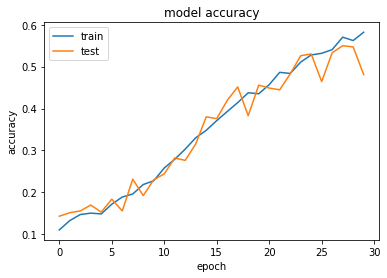

In [114]:
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Model 2

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


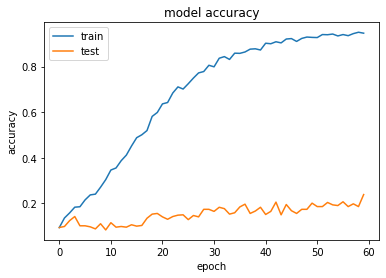

In [115]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Model 3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


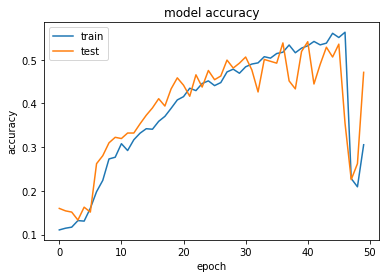

In [116]:
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Model 3 with Data Augumentation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


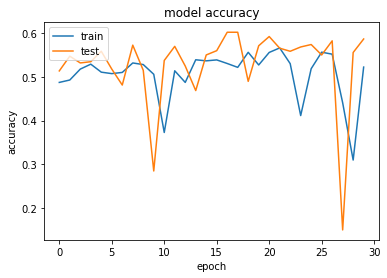

In [117]:
print(history4.history.keys())
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Model 3 with data augumentation performed better relatively

#7.<a name = "link7"></a> Model Evaluation

### Model 1

In [118]:
model1.evaluate(X_test,y_test)

23/23 [==============================] - 0s 4ms/step - loss: 1.6818 - accuracy: 0.4635


[1.6818232536315918, 0.46348315477371216]

### Model 2

In [119]:
model2.evaluate(X_test,y_test)

23/23 [==============================] - 0s 4ms/step - loss: 35.5172 - accuracy: 0.2093


[35.51723098754883, 0.2092696577310562]

### Model 3

In [120]:
model3.evaluate(X_test,y_test)

23/23 [==============================] - 0s 7ms/step - loss: 1.1842 - accuracy: 0.6011


[1.1842478513717651, 0.601123571395874]

Since the dataset is imbalanced, looking at the validation accuracy alone is not sufficient to measure the performance. We need to look at the precision and recall and look for F1 score to achieve a good balance between precision and recall,

# 8.<a name = "link8"></a>Plotting the confusion matrix for the two best models

In [121]:
from sklearn.metrics import confusion_matrix
import itertools
#plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



### Model 1

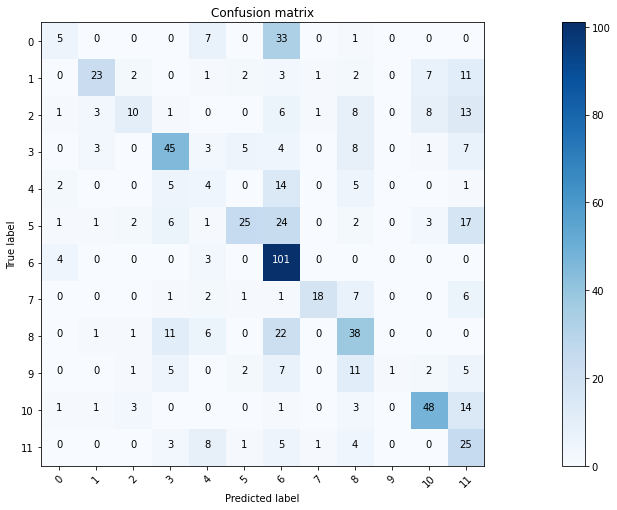

In [122]:

plt.subplots(figsize=(22,7)) #set the size of the plot 
# Predict the values from the validation dataset
Y_pred = model1.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(12))

Model 1 has lot of incorrecly predicted classes.But the incorrectly predicted classes seems scattered 

### Model 3

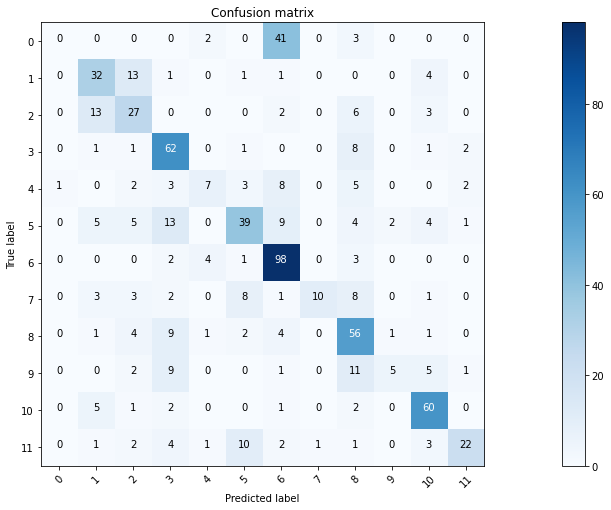

In [123]:

plt.subplots(figsize=(22,7)) #set the size of the plot 
# Predict the values from the validation dataset
Y_pred1 = model3.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes1 = np.argmax(Y_pred1,axis = 1) 
# Convert validation observations to one hot vectors
Y_true1 = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true1, Y_pred_classes1) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(12))

Model 3 was able to generalize better than model 2. As you can see 97 cases classified correcly with label 6. The above two confusion matrices show that the models seem to be working resonably well. Let's calculate the F1 score (the harmonic mean of precision and recall), which is used as an evaluation metric for imbalanced datasets.

The order of printing the above metrices for each class is as follows:

- **Small-flowered Cranesbill**
- **Fat Hen**
-**Shepherds Purse**
-**Common wheat**
-**Common Chickweed**
-**Charlock**
-**Cleavers**
-**Scentless Mayweed**
-**Sugar beet**
-**Maize**
-**Black-grass**
-**Loose Silky-bent**

In [124]:
from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(Y_true), Y_pred_classes, average=None,labels=list(np.unique(Y_true)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.35714286 0.71875    0.52631579 0.58441558 0.11428571 0.69444444
 0.45701357 0.85714286 0.42696629 1.         0.69565217 0.25252525]
 Recall is [0.10869565 0.44230769 0.19607843 0.59210526 0.12903226 0.30487805
 0.93518519 0.5        0.48101266 0.02941176 0.67605634 0.53191489] 
 f_beta Score is [0.16666667 0.54761905 0.28571429 0.58823529 0.12121212 0.42372881
 0.61398176 0.63157895 0.45238095 0.05714286 0.68571429 0.34246575]


In [125]:
from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(Y_true1), Y_pred_classes1, average=None,labels=list(np.unique(Y_true1)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.         0.52459016 0.45       0.57943925 0.46666667 0.6
 0.58333333 0.90909091 0.52336449 0.625      0.73170732 0.78571429]
 Recall is [0.         0.61538462 0.52941176 0.81578947 0.22580645 0.47560976
 0.90740741 0.27777778 0.70886076 0.14705882 0.84507042 0.46808511] 
 f_beta Score is [0.         0.56637168 0.48648649 0.67759563 0.30434783 0.53061224
 0.71014493 0.42553191 0.60215054 0.23809524 0.78431373 0.58666667]


Model 3 (Best) Observation

As we see from the precision for each class, the Small-flowered Cranesbill classifier has the highest precision. But here, we are more concerned about False negative cases. 74% of the plants belonging to Cleavers and 64% belonging to Loose silky bent are not identified correctly, which shows that our model does not do well in identifying these two categories of plants. But it is works well with Small-flowered Cranesbill

---


In [126]:
from sklearn.metrics import f1_score

f1_score(np.array(Y_true), Y_pred_classes, average='weighted')

0.4564276803852631

In [127]:
from sklearn.metrics import f1_score

f1_score(np.array(Y_true1), Y_pred_classes1, average='weighted')

0.5464851784234321

Model 1 has the highest F1 score

# 9. <a name = "link9"></a>Prediction

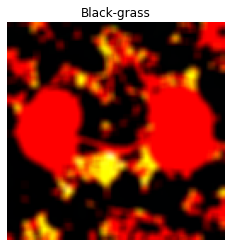

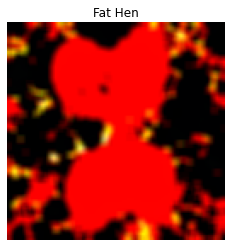

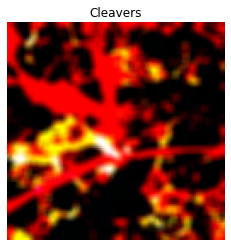

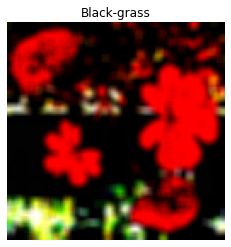

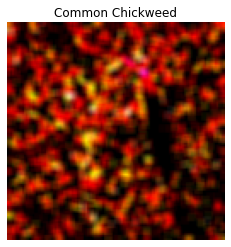

In [128]:
# Visualizing prediction for the below index of images
indxx = [2,3,33,36,59]
for x in indxx:
  plt.imshow(X_test[x])
  i=y_test[x]
  i=np.argmax(i)
  if(i == 0):
      plt.title("Small-flowered Cranesbill")
  if(i==1):
      plt.title("Fat Hen")
  if(i==2):
      plt.title("Shepherds Purse")
  if(i==3):
      plt.title("Common wheat")
  if(i == 4):
      plt.title("Common Chickweed")
  if(i==5):
      plt.title("Charlock")
  if(i==6):
      plt.title("Cleavers")
  if(i==7):
      plt.title("Scentless Mayweed")
  if(i==8):
      plt.title("Sugar beet")
  if(i==9):
      plt.title("Maize")
  if(i==10):
      plt.title("Black-grass")
  if(i==11):
      plt.title("Loose Silky-bent")
  plt.axis('off')
  plt.show()

# 10.<a name = "link10"></a>Conclusion

As we have seen, CNN model with **RMSprop optimizer** performed better than Adam optimizer with different dense layers.**The model 2** with 512 & 256 dense layers performed poorly with the validation despite different tuning of hyperparameters with different optimizer. **Data Augumentation** did help in improving the accuracy further. Few other observations:
- Overall I was able to achieve a maximum accuracy of 60% with RMSprop and data augumentation
- I tried other optimizers such as Adam, SGD, and Adadelta. I found only RMSProp performed better. Perhaps RMSprop is more suitable for image classification
- Image normalization with diving by 255 did not work well, it was giving poor accuracy. Hence I had to try normalizing with mean and standard deviation
- Since the accuracy overall is low, the model did not do well in identification of the few sample plant species 

There is still scope for improvement 

- Possibly try increasing the pixel dimension from 128x128 to 256x256 to improve the accuracy
- Try different architectures built with different hyperparamter tuning can be performed to obtain a better image classifier. 
- There is class imbalance, we can try to up/down sample to see if it improves the accuracy.